# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #1

**Name:** Jayanth Anala\
**NetID:** ja4874\
**Email:** ja4874@nyu.edu

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors
import pandas as pd
from scipy.io import wavfile

## Part A: Matrix Transformations (5 points):

In [31]:
####### TODO: PERFORM THE MATRIX TRANSFORMATION HERE ######

# You can modify this point (3,4) to better fit your algorithm.
original_point = [3, 4]
P = np.array([3, 4, 1])

theta = np.radians(30)
R = np.array([[np.cos(theta), -np.sin(theta), 0],[np.sin(theta), np.cos(theta), 0],[0, 0, 1]])
T = np.array([[1, 0, 3], [0, 1, -2], [0, 0, 1]])
M = T @ R
P_transformed = M @ P
x_new, y_new, _ = P_transformed
print("Original Point:", P[:2])
print("New Points:", [x_new, y_new])


Original Point: [3 4]
New Points: [3.5980762113533165, 2.9641016151377544]


1. Rotation matrix for counterclockwise rotation by 30 degrees. `R`
2. Translation matrix for 3 units rightward and 2 units downward. `T`
3. Singular matrix transformation can be done by dot product of `M` = `R.T`
4. Homogeneous coordinates transformation can be by dot product of `M` and `P` => `M.P`
5. We'll be getting the coordinated for the new point.

## Part B: Color Map (10 points):

In [32]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

# We read the data as a CSV file
url = "./datasets/height.csv"
data = pd.read_csv(url, delim_whitespace=True, header=None).values

# Getting the raw column data as `Long`, `Lat`, and `Elev`
Long = data[:,0]; Lat = data[:,1]; Elev = data[:,2];

tl = 5;
tw = 2;
lw = 3;
S = 30
pts=100000;

# `np.linspace` attempts to create a certain # of points when provided a minimum, a maximum, and an expected # of points
# We generate a meshgrid that creates `np.sqrt(pts)` values between the minimum and maximum possible values
# along the x-axis (Long) and y-axis (Lat).
[x,y] =np.meshgrid(
  np.linspace( min(Long), max(Long), int(np.sqrt(pts)) ),
  np.linspace( min(Lat), max(Lat), int(np.sqrt(pts)) )
)

# This code interpolates the original datasets (Long, Lat) and their corresponding elevations (Elev) along the
# coordinates provided by (x,y)
z = griddata((Long, Lat), Elev, (x, y), method='linear')

# We flatten all the data from a 2D to 1D representation
x = np.matrix.flatten(x)
y = np.matrix.flatten(y)
z = np.matrix.flatten(z)

In [33]:
print(z)
print('max:'+ str(max(z)))
print('min:'+ str(min(z)))

[-4676.         -4654.02008032 -4653.40975192 ... -4173.22840034
 -4148.55431993 -4236.        ]
max:2522.314972757023
min:-5492.489402148061


The Max element in z is 2522 (3000) and the Min element is -5561.00 (6000). We have elements rangings from +3000 to -6000 as elevation data.

-6000
-5000
-4000
-3000
-2000
-1000
0
1000
2000
3000


In [34]:
####### TODO: MODIFY THIS PART OF THE CODE ######

def color_map(z):
    colors_grad = ["#fafa6e","#ffd472","#ffb16f","#f79584","#d88297","#b275a1","#8a6b9d","#63618e","#425675","#2a4858"]
    colors = []
    for i in z:
      temp = int(i/100) + 54
      colors.append(colors_grad[int(temp/10)])
      # colors = np.zeros((np.size(z),3))

    return colors



1. **purpose**: This func generates a color map based on a given input array `z`. which contaisn elevations.

2. **Color Gradient**: The function defines a list `colors_grad` containing a gradient of hexadecimal color codes. This gradient transitions from yellow (`"#fafa6e"`) to dark blue (`"#2a4858"`).

3. **Color Map**: For each value `i` in the array `z`, the function calculates a corresponding index in the `colors_grad` array. It then assigns a color from the gradient to the `colors` list based on this index.

4. **Normalization**: The value `i` is divided by 100 and added to 54 to map it within the range of the color gradient indices. Which we have `8-10` categories.

5. **Output**: The function returns a list of colors (RGB) corresponding to the values in the array `z` to `distinguish areas of high and low elevation`.

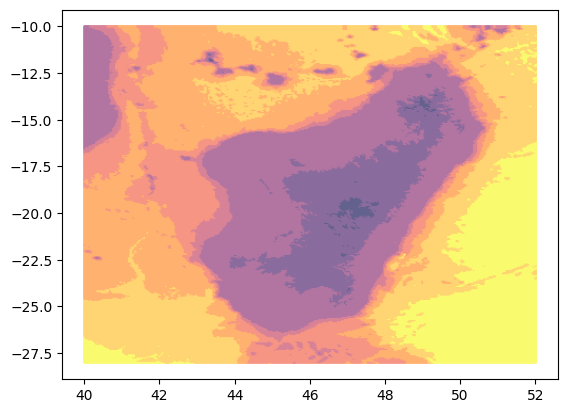

In [35]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #
plt.scatter(x,y,s=1,c=color_map(z))
plt.savefig("part_b_result.png", bbox_inches ="tight", pad_inches = 0)
plt.show()

## BONUS QUESTION: Color Frequency Analysis with Fourier Transforms (2 points):

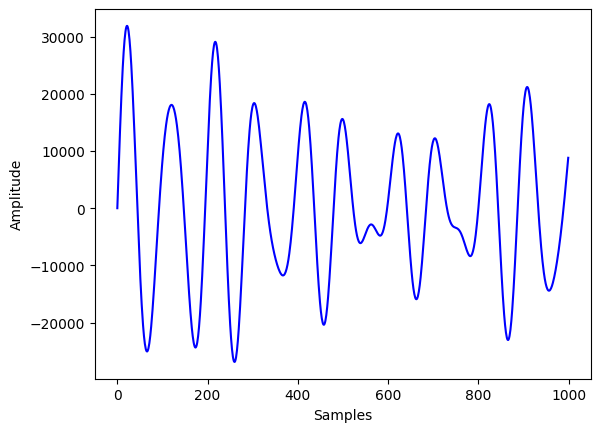

In [36]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

# The input signal has been generated with a 5-second duration, sampled at 44100 Hz
sample_rate, data = wavfile.read('./datasets/signal.wav')
duration = len(data)/sample_rate

# Plot the signal, only sampling the first 1000 data points for easy viewability
plt.plot(data[:1000], 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [37]:
####### TODO: MODIFY THIS PART OF THE CODE ######

def fourier_transform(data, sample_rate, duration):

    n = len(data)
    k = np.arange(n)
    T = n / sample_rate
    frq = k / T
    Y = np.fft.fft(data) / n
    frequency_range = np.where((frq >= 400) & (frq <= 700))
    xf = frq[frequency_range]
    yf = abs(Y[frequency_range])

    # xf = np.arange(400,700,1)
    # yf = np.zeros(len(xf))

    return xf, yf


    Performing Fourier Transformation on the signal...
    
    Args:
    - signal: 1D array containing the audio signal
    - sample_rate: Sampling rate of the signal
    - Duration: Length of the wav file
    
    Returns:
    - freq: Frequencies corresponding to the Fourier transformed signal
    - magnitude: Magnitude of the Fourier transformed signal


- We have a signal sampled at 44100 Hz and lasting for 5 seconds.
- We want to identify the frequencies of the three colors present in the signal.
- We performed a Fourier Transformation on the signal to analyze its frequency components. The Fourier Transformation breaks down the signal into its constituent frequencies.
- I have modified the `fourier_transform()` function to calculate the Fourier Transform. The func will return the x and y data for plotting the transformed signal.
- We'll limit the x-axis of the transformed data to show only the visible spectrum (400 Hz to 700 Hz) as per the tip.
- Once we have the frequency data, we'll plot it to visualize the spectrum.
- Peaks in the spectrum within the visible spectrum range correspond to the frequencies of the three colors in the signal.
    

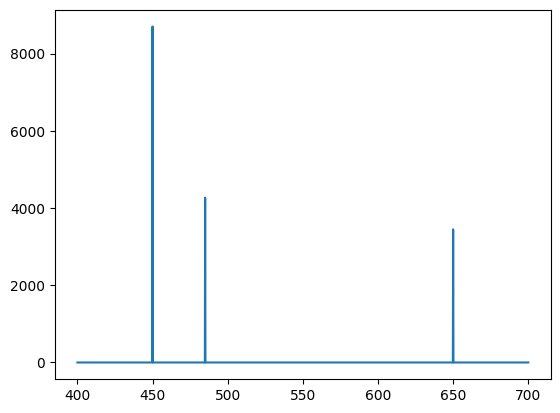

In [39]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

xf, yf = fourier_transform(data, sample_rate, duration)
plt.plot(xf, np.abs(yf))
plt.savefig("bonus_result.png", bbox_inches ="tight", pad_inches = 0)
plt.show()